In [2]:
import pandas as pd

# Reading Data

In [3]:
df=pd.read_csv("Symptoms_Data.csv")

In [4]:
df.head()

,Age,Fever,Fatigue,Runny_Nose,Difficulty_in_breath,Infection_probability
0,23,101.292240,0,1,0,1.0
1,2,98.716326,1,0,0,0.0
2,43,99.471792,0,0,1,0.0
3,48,98.336311,0,1,0,0.0
4,70,101.966568,1,0,0,1.0


In [5]:
df.tail()

,Age,Fever,Fatigue,Runny_Nose,Difficulty_in_breath,Infection_probability
4994,12,99.496629,0,0,1,0.0
4995,71,101.841717,0,1,0,1.0
4996,75,98.140476,0,0,1,0.0
4997,23,99.629487,0,0,0,0.0
4998,62,100.569352,1,1,1,1.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4999 entries, 0 to 4998
Data columns (total 6 columns):
Age                      4999 non-null int64
Fever                    4999 non-null float64
Fatigue                  4999 non-null int64
Runny_Nose               4999 non-null int64
Difficulty_in_breath     4999 non-null int64
Infection_probability    4999 non-null float64
dtypes: float64(2), int64(4)
memory usage: 234.5 KB


In [7]:
df["Runny_Nose"].value_counts()

0    2524
1    2475
Name: Runny_Nose, dtype: int64

In [8]:
df.describe()

,Age,Fever,Fatigue,Runny_Nose,Difficulty_in_breath,Infection_probability
count,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000,4999.000000
mean,50.549510,99.960329,0.498300,0.495099,0.501100,0.550510
std,28.770384,1.160019,0.500047,0.500026,0.500049,0.497492
min,1.000000,98.001196,0.000000,0.000000,0.000000,0.000000
25%,26.000000,98.960339,0.000000,0.000000,0.000000,0.000000
50%,50.000000,99.947375,0.000000,0.000000,1.000000,1.000000
75%,75.000000,100.958883,1.000000,1.000000,1.000000,1.000000
max,100.000000,101.994285,1.000000,1.000000,1.000000,1.000000


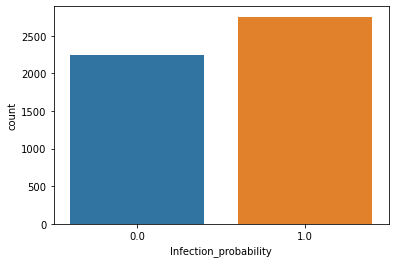

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(df.Infection_probability)
plt.show()

# Train Test 

In [10]:
import numpy as np

In [11]:
def data_split(data,ratio):
    shuffled= np.random.permutation(len(data))
    test_set_size=int(len(data)* ratio)
    test_indices=shuffled[:test_set_size]
    train_indices=shuffled[test_set_size:]
    return data.iloc[train_indices],data.iloc[test_indices]

In [12]:
train,test=data_split(df,0.2)

In [13]:
test
train

,Age,Fever,Fatigue,Runny_Nose,Difficulty_in_breath,Infection_probability
3402,30,99.984987,0,1,0,0.0
735,5,101.688787,1,0,0,1.0
4031,7,98.686307,0,1,1,1.0
4814,70,101.208559,1,1,0,1.0
2987,19,99.081149,0,1,0,0.0
...,...,...,...,...,...,...
3754,96,101.663374,1,1,1,1.0
400,82,98.680773,0,0,0,0.0
4060,86,99.143198,0,1,1,1.0
4412,64,99.028468,1,0,0,0.0


In [14]:
X_train=train[["Age","Fever","Fatigue","Runny_Nose","Difficulty_in_breath"]].to_numpy()
X_test=test[["Age","Fever","Fatigue","Runny_Nose","Difficulty_in_breath"]].to_numpy()

In [15]:
Y_train=train[["Infection_probability"]].to_numpy().reshape(4000,)
Y_test=test[["Infection_probability"]].to_numpy().reshape(999,)

In [16]:
from sklearn.linear_model import LogisticRegression

In [17]:
clf = LogisticRegression()

In [18]:
clf.fit(X_train,Y_train)

C:\Users\adev2\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
clf.predict_proba([[61,102,1,1,1]])[0][1]

0.9438957584637906